In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from utils import testPolicy, learnModel, plot
import time

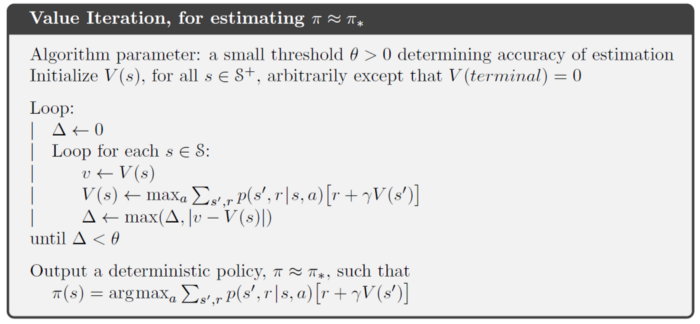

In [44]:
def valueItr(trans_prob, reward, win_state, env_name, map_size,  gamma=0.99, max_itr=100):
    """
    Value iteration

    : param trans_prob: ndarray, transition probabilities p(s'|a, s)
    : param reward: ndarray, reward function r(s, a, s')
    : param gamma: float, discount factor
    : param max_itr: int, maximum number of iteration
    : return:
        policy: updated policy
        success_rate: list, success rate for each iteration
    """
    success_rate = []
    num_state = trans_prob.shape[0]
    num_action = trans_prob.shape[1]

    # init policy and value function
    policy = np.zeros(num_state, dtype=int)
    value = np.zeros(num_state)

    for counter in range(max_itr):

        # value update
        for s in range(num_state):
            val = 0
            for a in range(num_action):
                tmp = 0
                for s_new in range(num_state):
                    tmp += trans_prob[s][a][s_new] * (
                            reward[s][a][s_new] + gamma * value[s_new]
                    )
                val = max(val, tmp)
            value[s] = val

        # policy recovery
        for s in range(num_state):
            val = 0
            for a in range(num_action):
                tmp = 0
                for s_new in range(num_state):
                    tmp += trans_prob[s][a][s_new] * (
                            reward[s][a][s_new] + gamma * value[s_new]
                    )
                if tmp > val:
                    policy[s] = a
                    val = tmp

        # test the policy for each iteration
        success_rate.append(testPolicy(policy, env_name, map_size ,win_state, trials=max_itr))
    return policy, success_rate

In [29]:
def trainModels(env, map_size ,win_state, iterations):
    policys = []
    success_rates = []
    for iteration in iterations:
        VI_policy, VI_success_rate = trainModel(env, map_size, win_state, iteration)
        policys.append(VI_policy)
        success_rates.append(VI_success_rate)
    return policys, success_rates

In [32]:
def trainModel(env_name, map_size, win_state, max_iter):
    env = gym.make(env_name, map_name = map_size, is_slippery=True)
    env.reset()

    # get transitional probability and reward function
    trans_prob, reward = learnModel(env)

    # Value Iteration
    VI_policy, VI_success_rate = valueItr(trans_prob, reward, env_name = env_name, map_size=map_size ,win_state=win_state, max_itr=max_iter)
    print("Final success rate of VI: {:.1f}%".format(VI_success_rate[-1] * 100))
    return VI_policy, VI_success_rate

# FrozenLake-v1 4x4

In [18]:
policys, success_rates = trainModels("FrozenLake-v1","4x4", 15, list(range(50,400,50)))


Final success rate of VI: 64.0%
Final success rate of VI: 76.0%
Final success rate of VI: 76.7%
Final success rate of VI: 61.5%
Final success rate of VI: 72.0%
Final success rate of VI: 60.3%
Final success rate of VI: 73.4%


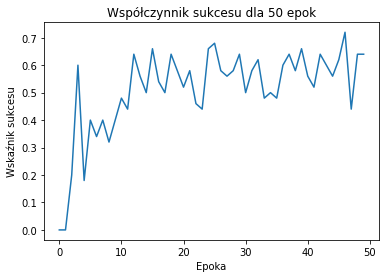

Num of iteration 50 Final success rate of VI: 64.0


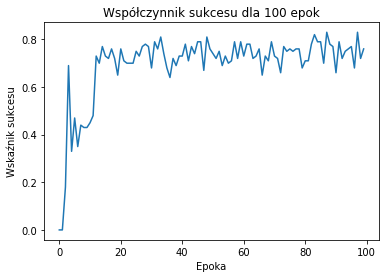

Num of iteration 100 Final success rate of VI: 76.0


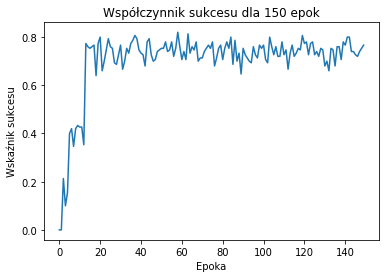

Num of iteration 150 Final success rate of VI: 76.66666666666667


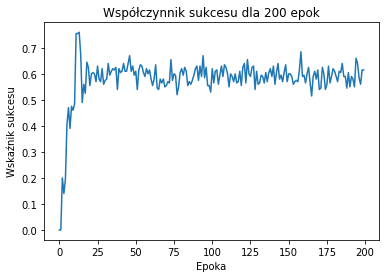

Num of iteration 200 Final success rate of VI: 61.5


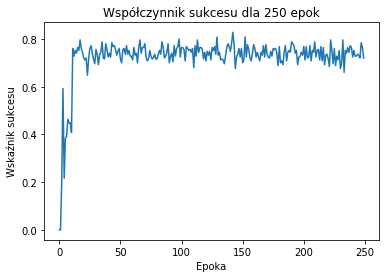

Num of iteration 250 Final success rate of VI: 72.0


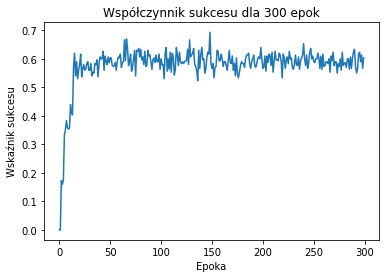

Num of iteration 300 Final success rate of VI: 60.333333333333336


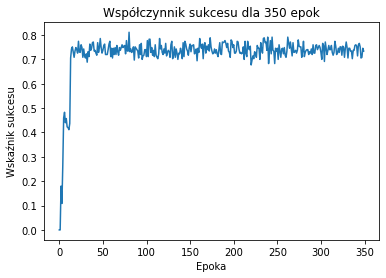

Num of iteration 350 Final success rate of VI: 73.42857142857143


In [19]:
ite = list(range(50,400,50))
for index in range(len(ite)):
    plot(success_rates[index], f"Współczynnik sukcesu dla {ite[index]} epok")
    print(f"Num of iteration {ite[index]} Final success rate of VI: {success_rates[index][-1] * 100}") 

In [51]:
policy, success_rate = trainModel("FrozenLake-v1","4x4" , 15, 250)

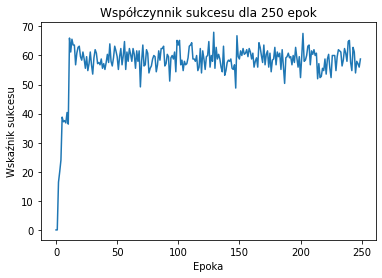

In [52]:
plot([i * 100 for i in success_rate], f"Współczynnik sukcesu dla 250 epok")

# FrozenLake-v1 8x8

In [13]:
policys, success_rates = trainModels("FrozenLake-v1", "8x8",63, list(range(50,400,50)))

Final success rate of VI: 92.0%
Final success rate of VI: 90.0%
Final success rate of VI: 38.7%
Final success rate of VI: 41.5%
Final success rate of VI: 35.2%
Final success rate of VI: 89.3%
Final success rate of VI: 78.3%


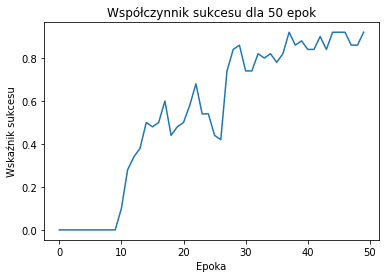

Num of iteration 50 Final success rate of VI: 92.0


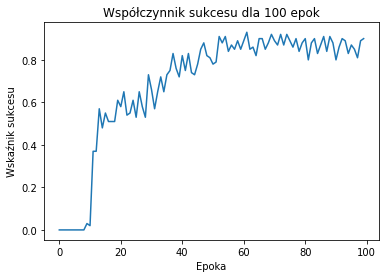

Num of iteration 100 Final success rate of VI: 90.0


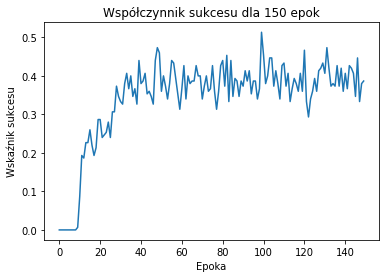

Num of iteration 150 Final success rate of VI: 38.666666666666664


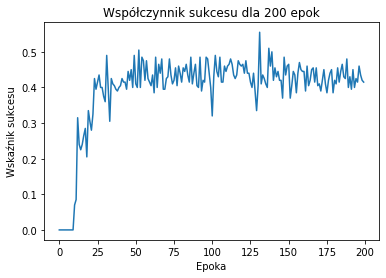

Num of iteration 200 Final success rate of VI: 41.5


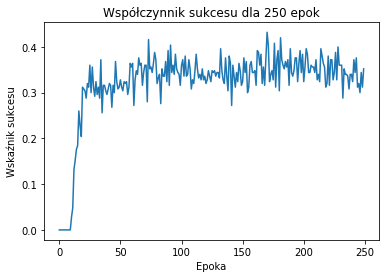

Num of iteration 250 Final success rate of VI: 35.199999999999996


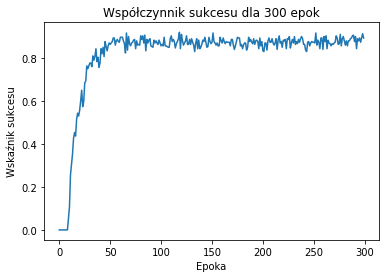

Num of iteration 300 Final success rate of VI: 89.33333333333333


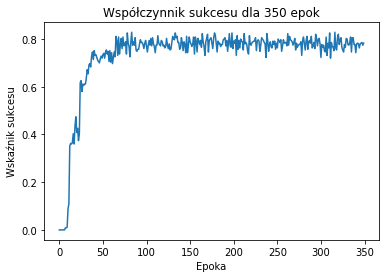

Num of iteration 350 Final success rate of VI: 78.28571428571428


In [14]:
ite = list(range(50,400,50))
for index in range(len(ite)):
    plot(success_rates[index], f"Współczynnik sukcesu dla {ite[index]} epok")
    print(f"Num of iteration {ite[index]} Final success rate of VI: {success_rates[index][-1] * 100}") 

In [ ]:
policy, success_rate = trainModel("FrozenLake-v1","8x8" , 63, 250)

plot([i * 100 for i in success_rate], f"Współczynnik sukcesu dla 250 epok")